In [1]:
from google.colab import files
x = files.upload()

Saving DataSetSplitted.zip to DataSetSplitted.zip


In [2]:
! unzip DataSetSplitted.zip

Archive:  DataSetSplitted.zip
   creating: DataSet/
   creating: DataSet/test/
   creating: DataSet/test/human/
  inflating: DataSet/test/human/Angelina-Jolie-100x130cm-2013.jpg  
  inflating: DataSet/test/human/b53d30e509b44bfc5f7bf3d3a03cc000fcd50623.jpeg  
  inflating: DataSet/test/human/dam-images-daily-2014-11-martin-schoeller-portraits-martin-schoeller-portraits-02.jpg  
  inflating: DataSet/test/human/default.jpg  
  inflating: DataSet/test/human/image24.jpeg  
  inflating: DataSet/test/human/image32.jpeg  
  inflating: DataSet/test/human/image33.jpeg  
  inflating: DataSet/test/human/images102.jpg  
  inflating: DataSet/test/human/images113.jpg  
  inflating: DataSet/test/human/images114.jpg  
  inflating: DataSet/test/human/images147.jpg  
  inflating: DataSet/test/human/images148.jpg  
  inflating: DataSet/test/human/images149.jpg  
  inflating: DataSet/test/human/images184.jpg  
  inflating: DataSet/test/human/images185.jpg  
  inflating: DataSet/test/human/images193.jpg  
 

In [3]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator = ImageDataGenerator(rescale=1./255)

In [5]:
augmentedImageGenerator1 = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.35,
    height_shift_range=0.35,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')

In [6]:
augmentedImageGenerator2 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.20,
    height_shift_range=0.20,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest'
)

In [7]:
augmentedImageGenerator3 = ImageDataGenerator(
    rotation_range=50,
    shear_range=0.45,
    zoom_range=0.45,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest'
)

In [8]:
# Generator for training dataset
augmentedTrain1 = augmentedImageGenerator1.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
augmentedTrain2 = augmentedImageGenerator2.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
augmentedTrain3 = augmentedImageGenerator3.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
# Generator for validation dataset
valid_generator = my_generator.flow_from_directory( './DataSet/validate/', target_size=(150, 150), batch_size=4, class_mode='binary')
# We may need to create another generator for the test dataset
# ??
test_generator = my_generator.flow_from_directory('./DataSet/test/', target_size=(150, 150), batch_size=4, class_mode='binary')

Found 738 images belonging to 2 classes.
Found 738 images belonging to 2 classes.
Found 738 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


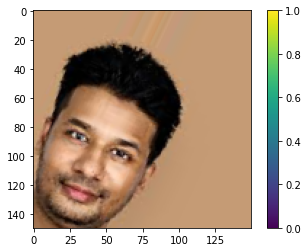

(150, 150, 3)
0.0


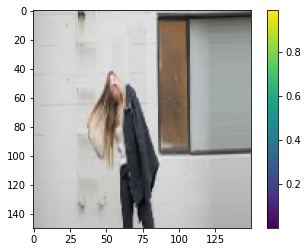

(150, 150, 3)
0.0


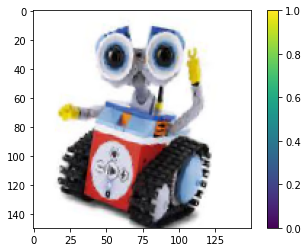

(150, 150, 3)
1.0


In [21]:
import matplotlib.pyplot as plt
for my_batch in augmentedTrain1:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break
for my_batch in augmentedTrain2:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break
for my_batch in augmentedTrain3:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

In [10]:
EPOCHS = 100
checkpoint_filepath = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_loss', verbose=1,mode='min',save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)
model = Sequential()
model.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( MaxPooling2D(4 ,4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPooling2D(4, 4) )
model.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model.add( Flatten() )
model.add( Dense( 10, activation = 'relu' ) )
model.add( Dense( 1, activation = 'sigmoid' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           3208      
                                                                 
 flatten (Flatten)           (None, 512)               0

In [11]:
model.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( augmentedTrain1, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

Epoch 1/100
 12/185 [>.............................] - ETA: 14s - loss: 0.7128 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 24s 125ms/step - loss: 0.6812 - accuracy: 0.5759 - val_loss: 0.6137 - val_accuracy: 0.6923
Epoch 2/100
185/185 [==============================] - 22s 120ms/step - loss: 0.5829 - accuracy: 0.7100 - val_loss: 0.4760 - val_accuracy: 0.7821
Epoch 3/100
185/185 [==============================] - 23s 124ms/step - loss: 0.5234 - accuracy: 0.7696 - val_loss: 0.5823 - val_accuracy: 0.6795
Epoch 4/100
185/185 [==============================] - 22s 119ms/step - loss: 0.4659 - accuracy: 0.7995 - val_loss: 0.6994 - val_accuracy: 0.6795
Epoch 5/100
185/185 [==============================] - 21s 116ms/step - loss: 0.4661 - accuracy: 0.7791 - val_loss: 0.5843 - val_accuracy: 0.7244
Epoch 6/100
185/185 [==============================] - 22s 118ms/step - loss: 0.4620 - accuracy: 0.7995 - val_loss: 0.6508 - val_accuracy: 0.6667
Epoch 7/100
185/185 [==============================] - 22s 116ms/step - loss: 0.4425 - accuracy: 0.8306 - val_loss: 0.5315 - val_accurac

In [12]:
model.evaluate(test_generator)

 1/36 [..............................] - ETA: 3s - loss: 0.9624 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 3s 92ms/step - loss: 0.5513 - accuracy: 0.7014


[0.5512659549713135, 0.7013888955116272]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

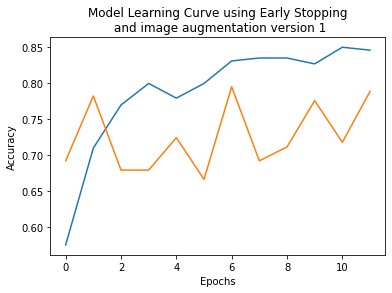

In [13]:
print(history.history.keys())
keyList = list(history.history.keys())
plt.plot(history.history[keyList[1]],label = "Training accuracy" )
plt.plot(history.history[keyList[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping\n and image augmentation version 1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Loss')

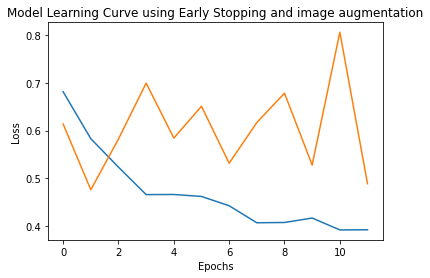

In [14]:
print(history.history.keys())
keyList = list(history.history.keys())
plt.plot(history.history[keyList[0]],label = "Training Loss" )
plt.plot(history.history[keyList[2]], label = "Validation Loss" )
plt.title("Model Learning Curve using Early Stopping and image augmentation")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [15]:
model1 = Sequential()
model1.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model1.add( MaxPooling2D(4 ,4) )
model1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model1.add( MaxPooling2D(4, 4) )
model1.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model1.add( Flatten() )
model1.add( Dense( 10, activation = 'relu' ) )
model1.add( Dense( 1, activation = 'sigmoid' ) )
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 8)           3208      
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [16]:
model1.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history1 = model1.fit( augmentedTrain2, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

Epoch 1/100
 46/185 [======>.......................] - ETA: 16s - loss: 0.6959 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 23s 119ms/step - loss: 0.6682 - accuracy: 0.5745 - val_loss: 0.5447 - val_accuracy: 0.7179
Epoch 2/100
 85/185 [============>.................] - ETA: 11s - loss: 0.5502 - accuracy: 0.7382

KeyboardInterrupt: ignored

In [ ]:
model1.evaluate(test_generator)

In [ ]:
print(history1.history.keys())
keyList1 = list(history1.history.keys())
plt.plot(history1.history[keyList1[1]],label = "Training accuracy" )
plt.plot(history1.history[keyList1[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping\n and image augmentation version 2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
model2 = Sequential()
model2.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model2.add( MaxPooling2D(4 ,4) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( MaxPooling2D(4, 4) )
model2.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model2.add( Flatten() )
model2.add( Dense( 10, activation = 'relu' ) )
model2.add( Dense( 1, activation = 'sigmoid' ) )
model2.summary()

In [ ]:
model2.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history2 = model1.fit( augmentedTrain3, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

In [ ]:
model2.evaluate(test_generator)

In [ ]:
print(history2.history.keys())
keyList2 = list(history2.history.keys())
plt.plot(history2.history[keyList2[1]],label = "Training accuracy" )
plt.plot(history2.history[keyList2[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping\n and image augmentation version 3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
%%shell
jupyter nbconvert --to html /content/Phase4.ipynb